In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter(action='ignore')

In [18]:
df = pd.read_csv('churn.csv')

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.shape

(10000, 14)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [22]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
df.isnull().sum().sum()

0

In [25]:
df = df.drop_duplicates()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


{'whiskers': [<matplotlib.lines.Line2D at 0x25e83773040>,
 'caps': [<matplotlib.lines.Line2D at 0x25e837735e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e83772d70>],
 'medians': [<matplotlib.lines.Line2D at 0x25e83773b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e83773e50>],
 'means': []}

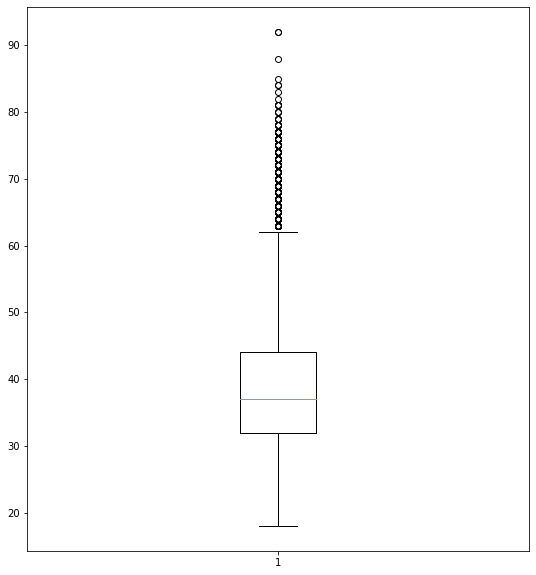

In [26]:
fig = plt.figure(figsize =(9, 10))
plt.boxplot(df['Age'])

In [27]:
df.drop(columns=['RowNumber'], inplace=True)
df.drop(columns=['CustomerId'], inplace =True)
df.drop(columns=['Surname'], inplace =True)

In [28]:
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df['Geography'] = df['Geography'].map( {'Spain': 0, 'France': 1, 'Germany': 2 } ).astype(int)

In [29]:
from IPython.display import display
import pandas as pd
  
# creating a DataFrame
dict = {'Min Age' : [df['Age'].min()],
        'Max Age' : [df['Age'].max()],
        'Mean Age': [df['Age'].mean()],
        'Median Age': [df['Age'].median()],
         }
dataframe = pd.DataFrame(dict)
  
# displaying the DataFrame
#display(dataframe)
dataframe

,Min Age,Max Age,Mean Age,Median Age
0,18,92,38.9218,37.0


In [30]:
values = np.array(df.Geography)

# Integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# One-hot encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# Auslesen der Werte
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
inverted2 = label_encoder.inverse_transform([np.argmax(onehot_encoded[1, :])])
print(inverted, inverted2)


### create columns for binary variables - train
df["France"] = pd.DataFrame({'France': onehot_encoded[:, 0]})
df["Spain"] = pd.DataFrame({'Spain': onehot_encoded[:, 2]})
df["Germany"] = pd.DataFrame({'Germany': onehot_encoded[:, 1]})    

[1 0 1 ... 1 2 1]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[1] [0]


In [ ]:
df['Ege_ord']= pd.cut(x=df['CreditScore'],
bins=[10, 20, 30 ,40,50,60,70,80,90],labels=["18 to 30", "31 to 40", "41 to 50", '51 to 60','61 to 100'])

In [39]:
df['CreditScore_ord']= pd.cut(x=df['CreditScore'],
bins=[350, 500, 700 ,950],
labels=['350 to 500', '501 to 699', '700 to 950' ])  

In [40]:
dict = {'Min Balance' : [df['Balance'].min()],
        'Max Balance' : [df['Balance'].max()],
        'Mean Balance': [df['Balance'].mean()],
        'Median Balance': [df['Balance'].median()],
         }
dataframe = pd.DataFrame(dict)
  
# displaying the DataFrame
#display(dataframe)
dataframe

,Min Balance,Max Balance,Mean Balance,Median Balance
0,0.0,250898.09,76485.889288,97198.54


<AxesSubplot:xlabel='Balance', ylabel='Density'>

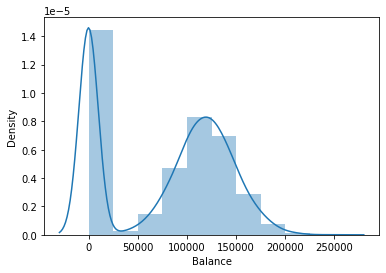

In [41]:
sns.distplot(df['Balance'],bins=10, kde=True)

In [42]:
df['Balance_ord']= pd.cut(x=df['Balance'],
bins=[0,25000 ,50000,100000,200000,250900 ],
labels=['0 to 25000',
        '25001 to 50000', 
        '50001 to 100000', 
        '100001 to 200000',
        '200001 to 250900' ]
,right=False)

In [43]:
dict = {'Min EstimatedSalary' : [df['EstimatedSalary'].min()],
        'Max EstimatedSalary' : [df['EstimatedSalary'].max()],
        'Mean EstimatedSalary': [df['EstimatedSalary'].mean()],
        'Median EstimatedSalary': [df['EstimatedSalary'].median()],
         }
dataframe = pd.DataFrame(dict)
  
# displaying the DataFrame
#display(dataframe)
dataframe

,Min EstimatedSalary,Max EstimatedSalary,Mean EstimatedSalary,Median EstimatedSalary
0,11.58,199992.48,100090.239881,100193.915


In [ ]:
df.to_parquet('df_prossesing.parquet')